In [2]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import pickle 
import patsy
import seaborn as sns
#from seaborn import plt (alternate)
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_selection import f_regression
from sklearn.cross_validation import cross_val_score


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read compiled data for regression analysis
yX = pd.read_pickle('data/X_data.pkl')
print("Number of Data Points:",yX.shape[0])

Number of Data Points: 100185


In [4]:
X = yX.drop('Prices',axis=1)
y = yX['Prices']

In [13]:
# Check the correlation on the dataset
yX.corr()

,Prices,Sq_Ft,Lot_Size,Years_Since_Built,Days_On_Site,HOA,Fireplace_b,Pool_b,Condominium,Single Family Residence,...,Santa Clara,Saratoga,South San Francisco,Stanford,Sunnyvale,Sunol,Unincorporated,Union City,Watsonville,Woodside
Prices,1.000000,0.686080,-0.002590,-0.027737,-0.116280,-0.190092,0.124017,-0.172433,-0.240926,0.268261,...,-0.002423,0.148364,-0.028236,0.020142,0.059835,0.006780,-0.000095,-0.054012,-0.001480,0.135792
Sq_Ft,0.686080,1.000000,-0.002933,-0.218093,-0.001130,-0.201266,0.195304,-0.039803,-0.313260,0.324281,...,-0.051192,0.103248,-0.035877,0.009113,-0.031175,0.019535,0.001315,-0.011017,0.002334,0.088532
Lot_Size,-0.002590,-0.002933,1.000000,0.001827,0.004829,0.000339,0.003501,0.002246,0.004248,-0.000956,...,-0.000760,-0.000432,-0.000698,-0.000188,-0.000487,-0.000193,0.001576,-0.000511,-0.000078,-0.000533
Years_Since_Built,-0.027737,-0.218093,0.001827,1.000000,-0.007630,-0.379510,0.110185,0.003888,-0.281184,0.401395,...,-0.007157,-0.003025,0.009546,0.001850,-0.016791,0.010217,-0.001133,-0.055564,-0.000245,0.001579
Days_On_Site,-0.116280,-0.001130,0.004829,-0.007630,1.000000,-0.008507,-0.006688,-0.005323,0.007321,-0.007387,...,-0.008363,0.002175,0.007324,-0.002867,-0.011619,0.003431,-0.003428,0.008310,-0.000897,0.004940
HOA,-0.190092,-0.201266,0.000339,-0.379510,-0.008507,1.000000,-0.206913,0.194381,0.654585,-0.779647,...,0.025893,-0.023048,0.004402,0.006802,0.007218,-0.001599,-0.001856,-0.016533,-0.002625,-0.017426
Fireplace_b,0.124017,0.195304,0.003501,0.110185,-0.006688,-0.206913,1.000000,0.209753,-0.245818,0.279473,...,-0.080862,0.021066,-0.031925,0.000012,-0.080906,0.006563,0.001319,0.037126,0.001865,0.007004
Pool_b,-0.172433,-0.039803,0.002246,0.003888,-0.005323,0.194381,0.209753,1.000000,0.179712,-0.191522,...,-0.066583,-0.025330,-0.097952,-0.008341,-0.094590,0.014286,0.002863,0.079151,-0.004930,-0.016329
Condominium,-0.240926,-0.313260,0.004248,-0.281184,0.007321,0.654585,-0.245818,0.179712,1.000000,-0.750228,...,0.025111,-0.024484,0.014762,0.000555,-0.009550,-0.008773,-0.001442,-0.008067,-0.002039,-0.019869
Single Family Residence,0.268261,0.324281,-0.000956,0.401395,-0.007387,-0.779647,0.279473,-0.191522,-0.750228,1.000000,...,-0.038570,0.028720,-0.000084,0.001773,-0.031268,0.011694,0.001922,-0.006620,0.002718,0.027039


In [12]:
# Check the correlation on the dataset
X.corr()

,Sq_Ft,Lot_Size,Years_Since_Built,Days_On_Site,HOA,Fireplace_b,Pool_b,Condominium,Single Family Residence,Townhouse,...,Santa Clara,Saratoga,South San Francisco,Stanford,Sunnyvale,Sunol,Unincorporated,Union City,Watsonville,Woodside
Sq_Ft,1.000000,-0.002933,-0.218093,-0.001130,-0.201266,0.195304,-0.039803,-0.313260,0.324281,-0.086414,...,-0.051192,0.103248,-0.035877,0.009113,-0.031175,0.019535,0.001315,-0.011017,0.002334,0.088532
Lot_Size,-0.002933,1.000000,0.001827,0.004829,0.000339,0.003501,0.002246,0.004248,-0.000956,-0.003974,...,-0.000760,-0.000432,-0.000698,-0.000188,-0.000487,-0.000193,0.001576,-0.000511,-0.000078,-0.000533
Years_Since_Built,-0.218093,0.001827,1.000000,-0.007630,-0.379510,0.110185,0.003888,-0.281184,0.401395,-0.242523,...,-0.007157,-0.003025,0.009546,0.001850,-0.016791,0.010217,-0.001133,-0.055564,-0.000245,0.001579
Days_On_Site,-0.001130,0.004829,-0.007630,1.000000,-0.008507,-0.006688,-0.005323,0.007321,-0.007387,0.001733,...,-0.008363,0.002175,0.007324,-0.002867,-0.011619,0.003431,-0.003428,0.008310,-0.000897,0.004940
HOA,-0.201266,0.000339,-0.379510,-0.008507,1.000000,-0.206913,0.194381,0.654585,-0.779647,0.333139,...,0.025893,-0.023048,0.004402,0.006802,0.007218,-0.001599,-0.001856,-0.016533,-0.002625,-0.017426
Fireplace_b,0.195304,0.003501,0.110185,-0.006688,-0.206913,1.000000,0.209753,-0.245818,0.279473,-0.105203,...,-0.080862,0.021066,-0.031925,0.000012,-0.080906,0.006563,0.001319,0.037126,0.001865,0.007004
Pool_b,-0.039803,0.002246,0.003888,-0.005323,0.194381,0.209753,1.000000,0.179712,-0.191522,0.057781,...,-0.066583,-0.025330,-0.097952,-0.008341,-0.094590,0.014286,0.002863,0.079151,-0.004930,-0.016329
Condominium,-0.313260,0.004248,-0.281184,0.007321,0.654585,-0.245818,0.179712,1.000000,-0.750228,-0.150231,...,0.025111,-0.024484,0.014762,0.000555,-0.009550,-0.008773,-0.001442,-0.008067,-0.002039,-0.019869
Single Family Residence,0.324281,-0.000956,0.401395,-0.007387,-0.779647,0.279473,-0.191522,-0.750228,1.000000,-0.540968,...,-0.038570,0.028720,-0.000084,0.001773,-0.031268,0.011694,0.001922,-0.006620,0.002718,0.027039
Townhouse,-0.086414,-0.003974,-0.242523,0.001733,0.333139,-0.105203,0.057781,-0.150231,-0.540968,1.000000,...,0.025730,-0.011800,-0.018652,-0.003356,0.058903,-0.006326,-0.001040,0.020159,-0.001471,-0.015156


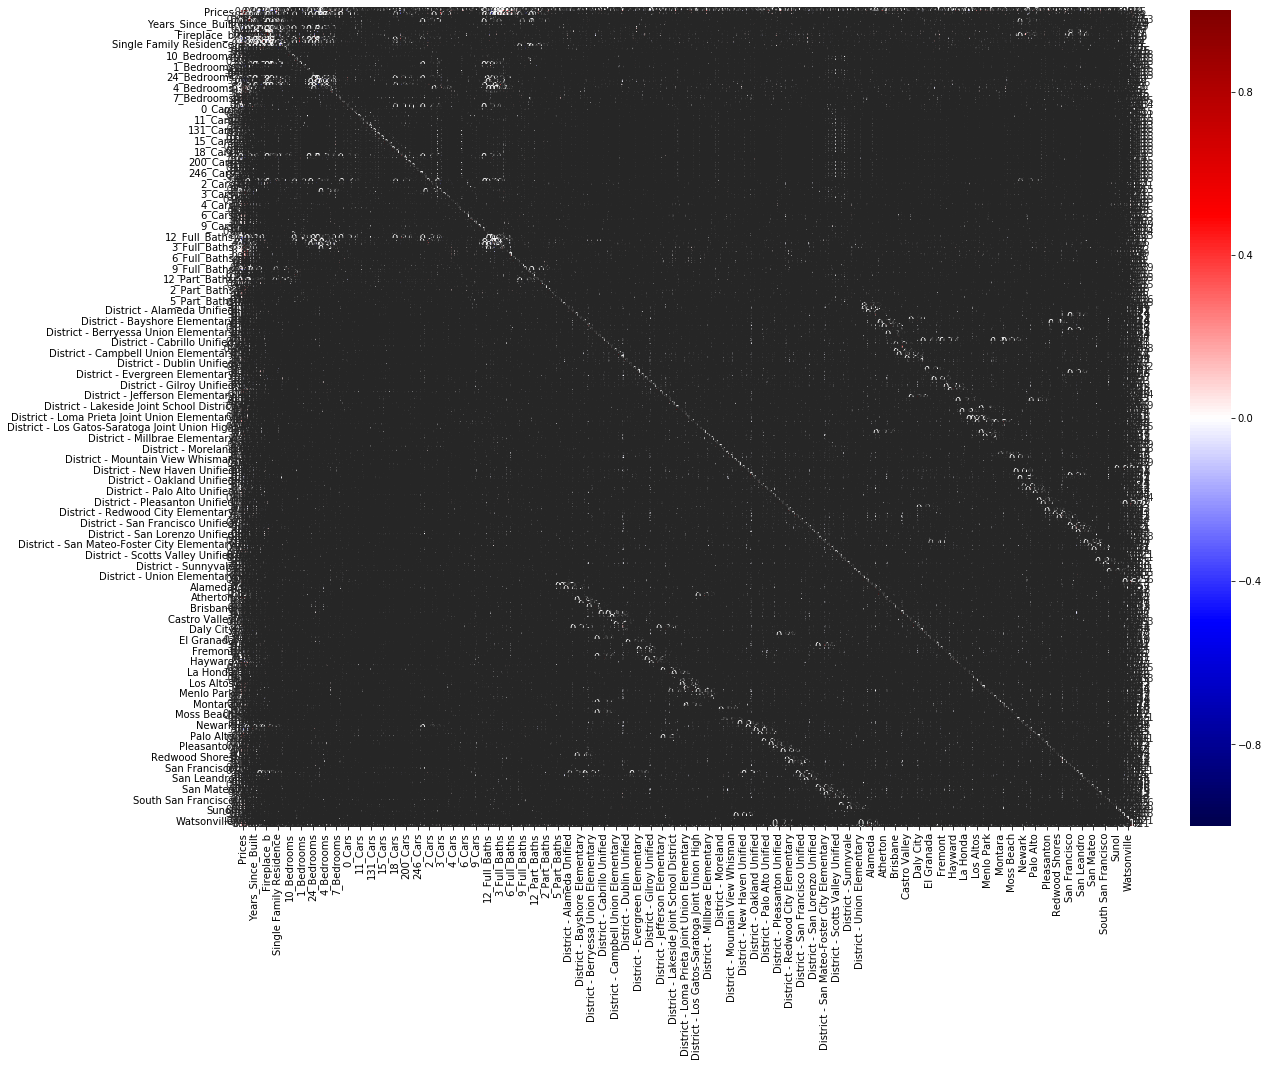

In [6]:
# example of a better corr matrix
plt.subplots(figsize=(20,15))
sns.heatmap(yX.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [1]:
# example of a better corr matrix
plt.subplots(figsize=(900,780))
sns.heatmap(yX.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

NameError: name 'plt' is not defined

In [24]:
# Drop features based on correlations
yX = yX.drop(['0_Bedrooms', '10_Bedrooms', '12_Bedrooms', '14_Bedrooms', '1_Bedrooms', '20_Bedrooms', '21_Bedrooms', '24_Bedrooms', '2_Bedrooms', '3_Bedrooms', '4_Bedrooms', '5_Bedrooms', '6_Bedrooms', '7_Bedrooms', '8_Bedrooms', '9_Bedrooms', '100_Cars', '127_Cars', '12_Cars','131_Cars', '132_Cars', '13_Cars', '15_Cars', '16_Cars', '17_Cars', '18_Cars', '191_Cars', '200_Cars', '20_Cars', '23_Cars', '246_Cars', '25_Cars', '26_Cars', '35_Cars', '37_Cars', '40_Cars', '42_Cars', '66_Cars'],axis=1)

In [ ]:
[100_Cars', '127_Cars', '12_Cars','131_Cars', '132_Cars', '13_Cars', '15_Cars', '16_Cars', '17_Cars', '18_Cars', '191_Cars', '200_Cars', '20_Cars', '23_Cars', '246_Cars', '25_Cars', '26_Cars', '35_Cars', '37_Cars', '40_Cars', '42_Cars', '66_Cars']

# ['0_Cars' '100_Cars' '10_Cars' '11_Cars' '127_Cars' '12_Cars' '131_Cars'
#  '132_Cars' '13_Cars' '15_Cars' '16_Cars' '17_Cars' '18_Cars' '191_Cars'
#  '1_Cars' '200_Cars' '20_Cars' '23_Cars' '246_Cars' '25_Cars' '26_Cars'
#  '2_Cars' '35_Cars' '37_Cars' '3_Cars' '40_Cars' '42_Cars' '4_Cars'
#  '5_Cars' '66_Cars' '6_Cars' '7_Cars' '8_Cars' '9_Cars' '_Cars']

In [26]:
pd.set_option('display.max_colwidth', -1)
yX.corr()

,Prices,Sq_Ft,Lot_Size,Years_Since_Built,Days_On_Site,HOA,Fireplace_b,Pool_b,Condominium,Single Family Residence,...,Santa Clara,Saratoga,South San Francisco,Stanford,Sunnyvale,Sunol,Unincorporated,Union City,Watsonville,Woodside
Prices,1.000000,0.686080,-0.002590,-0.027737,-0.116280,-0.190092,0.124017,-0.172433,-0.240926,0.268261,...,-0.002423,0.148364,-0.028236,0.020142,0.059835,0.006780,-0.000095,-0.054012,-0.001480,0.135792
Sq_Ft,0.686080,1.000000,-0.002933,-0.218093,-0.001130,-0.201266,0.195304,-0.039803,-0.313260,0.324281,...,-0.051192,0.103248,-0.035877,0.009113,-0.031175,0.019535,0.001315,-0.011017,0.002334,0.088532
Lot_Size,-0.002590,-0.002933,1.000000,0.001827,0.004829,0.000339,0.003501,0.002246,0.004248,-0.000956,...,-0.000760,-0.000432,-0.000698,-0.000188,-0.000487,-0.000193,0.001576,-0.000511,-0.000078,-0.000533
Years_Since_Built,-0.027737,-0.218093,0.001827,1.000000,-0.007630,-0.379510,0.110185,0.003888,-0.281184,0.401395,...,-0.007157,-0.003025,0.009546,0.001850,-0.016791,0.010217,-0.001133,-0.055564,-0.000245,0.001579
Days_On_Site,-0.116280,-0.001130,0.004829,-0.007630,1.000000,-0.008507,-0.006688,-0.005323,0.007321,-0.007387,...,-0.008363,0.002175,0.007324,-0.002867,-0.011619,0.003431,-0.003428,0.008310,-0.000897,0.004940
HOA,-0.190092,-0.201266,0.000339,-0.379510,-0.008507,1.000000,-0.206913,0.194381,0.654585,-0.779647,...,0.025893,-0.023048,0.004402,0.006802,0.007218,-0.001599,-0.001856,-0.016533,-0.002625,-0.017426
Fireplace_b,0.124017,0.195304,0.003501,0.110185,-0.006688,-0.206913,1.000000,0.209753,-0.245818,0.279473,...,-0.080862,0.021066,-0.031925,0.000012,-0.080906,0.006563,0.001319,0.037126,0.001865,0.007004
Pool_b,-0.172433,-0.039803,0.002246,0.003888,-0.005323,0.194381,0.209753,1.000000,0.179712,-0.191522,...,-0.066583,-0.025330,-0.097952,-0.008341,-0.094590,0.014286,0.002863,0.079151,-0.004930,-0.016329
Condominium,-0.240926,-0.313260,0.004248,-0.281184,0.007321,0.654585,-0.245818,0.179712,1.000000,-0.750228,...,0.025111,-0.024484,0.014762,0.000555,-0.009550,-0.008773,-0.001442,-0.008067,-0.002039,-0.019869
Single Family Residence,0.268261,0.324281,-0.000956,0.401395,-0.007387,-0.779647,0.279473,-0.191522,-0.750228,1.000000,...,-0.038570,0.028720,-0.000084,0.001773,-0.031268,0.011694,0.001922,-0.006620,0.002718,0.027039


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
# Let's start with filtering features using p-value:
est=LinearRegression()
from sklearn import feature_selection as f_select

sig_columns=[]
pvals=[] # will be the list of all significant columns' p-values

for feature in X.columns:
    #get pval on feature by feature basis
    pval=f_select.f_regression(X_train[[feature]],y_train) # gets f-value and p-value
#     print(pval)
    if pval[1][0]<.02: 
        sig_columns.append(feature)
        pvals.append(pval[1][0])

X_trans=X[sig_columns]
cross_val_score(est,X_trans,y,cv=10,scoring='r2').mean()

0.713080423183081

In [11]:
X_trans.corr()

,Sq_Ft,Years_Since_Built,Days_On_Site,HOA,Fireplace_b,Pool_b,Condominium,Single Family Residence,Townhouse,0_Bedrooms,...,San Jose,San Leandro,San Lorenzo,San Mateo,Saratoga,South San Francisco,Stanford,Sunnyvale,Union City,Woodside
Sq_Ft,1.000000,-0.218093,-0.001130,-0.201266,0.195304,-0.039803,-0.313260,0.324281,-0.086414,-0.070479,...,-0.058882,-0.049245,-0.036937,-0.034389,0.103248,-0.035877,0.009113,-0.031175,-0.011017,0.088532
Years_Since_Built,-0.218093,1.000000,-0.007630,-0.379510,0.110185,0.003888,-0.281184,0.401395,-0.242523,-0.007706,...,-0.086383,0.072318,0.038934,0.048430,-0.003025,0.009546,0.001850,-0.016791,-0.055564,0.001579
Days_On_Site,-0.001130,-0.007630,1.000000,-0.008507,-0.006688,-0.005323,0.007321,-0.007387,0.001733,0.009213,...,-0.001862,0.001276,-0.005556,0.000809,0.002175,0.007324,-0.002867,-0.011619,0.008310,0.004940
HOA,-0.201266,-0.379510,-0.008507,1.000000,-0.206913,0.194381,0.654585,-0.779647,0.333139,0.061797,...,0.006890,-0.041517,-0.000059,0.083448,-0.023048,0.004402,0.006802,0.007218,-0.016533,-0.017426
Fireplace_b,0.195304,0.110185,-0.006688,-0.206913,1.000000,0.209753,-0.245818,0.279473,-0.105203,-0.062097,...,-0.186135,0.058338,0.027697,-0.030408,0.021066,-0.031925,0.000012,-0.080906,0.037126,0.007004
Pool_b,-0.039803,0.003888,-0.005323,0.194381,0.209753,1.000000,0.179712,-0.191522,0.057781,0.034412,...,-0.294698,0.124243,0.063838,-0.092487,-0.025330,-0.097952,-0.008341,-0.094590,0.079151,-0.016329
Condominium,-0.313260,-0.281184,0.007321,0.654585,-0.245818,0.179712,1.000000,-0.750228,-0.150231,0.113367,...,0.039167,-0.021926,-0.031434,0.063432,-0.024484,0.014762,0.000555,-0.009550,-0.008067,-0.019869
Single Family Residence,0.324281,0.401395,-0.007387,-0.779647,0.279473,-0.191522,-0.750228,1.000000,-0.540968,-0.084675,...,-0.046560,0.034810,0.026738,-0.040161,0.028720,-0.000084,0.001773,-0.031268,-0.006620,0.027039
Townhouse,-0.086414,-0.242523,0.001733,0.333139,-0.105203,0.057781,-0.150231,-0.540968,1.000000,-0.017594,...,0.019799,-0.024160,0.000005,-0.020635,-0.011800,-0.018652,-0.003356,0.058903,0.020159,-0.015156
0_Bedrooms,-0.070479,-0.007706,0.009213,0.061797,-0.062097,0.034412,0.113367,-0.084675,-0.017594,1.000000,...,-0.021779,-0.008741,-0.004516,0.024452,-0.005438,-0.006137,-0.000937,-0.009130,-0.007706,-0.002627


In [46]:
# X_trans.columns
# len(sig_columns)
VIF

156